In this program we use Scikit-learn package to do logistic regression on two different datasets details of which are given below. 

Importing dependencies 

In [193]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import accuracy_score, precision_score, recall_score

When the data is not linearly spearable, mapFeature can be used to generate additional fearures.

In [194]:
def mapFeature(X1, X2, degree):
    out = np.ones(( X1.shape[0], sum(range(degree + 2)) )) # could also use ((degree+1) * (degree+2)) / 2 instead of sum
    curr_column = 1
    for i in range(1, degree + 1):
        for j in range(i+1):
            out[:,curr_column] = np.power(X1,i-j) * np.power(X2,j)
            curr_column += 1
    return out

Print scores

In [195]:
def print_score(X,Y,logreg):
    predictions=logreg.predict(X)
    print('Accuracy:', accuracy_score(Y, predictions))
    print('Precision:', precision_score(Y, predictions, average='macro'))
    print('Recall:', recall_score(Y, predictions, average='macro'))

Plot the decision boundaries

In [196]:
def plot_boundary(X,y,degree,logreg):
    x_min, x_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    y_min, y_max = X[:, 2].min() - .5, X[:, 2].max() + .5
    xs, ys = np.meshgrid(np.linspace(x_min, x_max, 200),np.linspace(y_min, y_max, 200))
    xys = mapFeature(xs.ravel(),ys.ravel(),degree)
    Z = logreg.predict(xys).reshape(xs.shape)
    plt.pcolormesh(xs, ys, Z, cmap=plt.cm.Paired)
    plt.scatter(X[:, 1], X[:, 2], c=Y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlim(xs.min(), xs.max())
    plt.ylim(ys.min(), ys.max())
    plt.xticks(())
    plt.yticks(())
    return plt

Example 1: The two class of data can be seprated using a line.

In [197]:
#Load the data
data = np.loadtxt('data1.txt', delimiter=",")
X = data[:,:2]
Y = data[:,2]

Example specific input parameters

In [198]:
degree=1 #Degree of 
lambda_=1e-5 #Rregularaization parameter

Running Logistic Regression and plotting the data and decision boundary

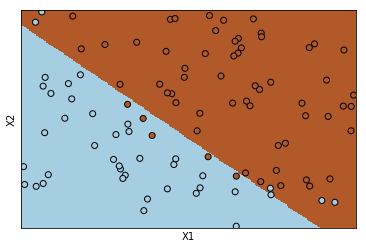

In [199]:
X = mapFeature(X[:,0], X[:,1],degree)
logreg = linear_model.LogisticRegression(C=1/lambda_)
logreg.fit(X, Y)
plt=plot_boundary(X,Y,degree,logreg)
plt=plot_boundary(X,Y,degree,logreg)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

Example 2: When the data is not easy to separate using a line

In [200]:
#Load the data
data = np.loadtxt('data2.txt', delimiter=",")
X = data[:,:2]
Y = data[:,2]

Example specific input parameters

In [201]:
degree=6
lambda_=1e-5

Accuracy: 0.872881355932
Precision: 0.87518037518
Recall: 0.873563218391


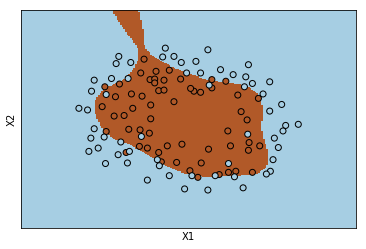

In [202]:
X = mapFeature(X[:,0], X[:,1],degree)
logreg = linear_model.LogisticRegression(C=1/lambda_)
logreg.fit(X, Y)
print_score(X,Y,logreg)
plt=plot_boundary(X,Y,degree,logreg)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()